<a href="https://colab.research.google.com/github/PedroGuimaraesFerreira/Py_Projects/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A. Importing the necessary libraries


---



In [0]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px
import plotly.offline as py
plt.style.use('fivethirtyeight')
%matplotlib inline 

import numpy as np
import random
import math
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pandas_profiling
from pandas_profiling import ProfileReport
import time
import datetime
from datetime import date, timedelta


import scipy
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import xgboost
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
import datetime
import operator 

from bs4 import BeautifulSoup
import requests
import csv

from geopy.geocoders import Nominatim
!pip install geocoder
import geocoder
import folium

### B. Importing the raw COVID-19 data into three different data frames
---

In [0]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

> ### B.1 Checking the heads of the three data frames regarding COVID-19's data from 1/22/2020 to 5/14/2020


  *   confirmed_df : contains countries' time series data of the evolution of confirmed cases (cases values are acumulated as time increases in the time series); 

  *   deaths_df : contains countries' time series data of the evolution of deaths (deaths values are acumulated as time increases in time series); 

  *   recoveries_df : contains countries' time series data of the evolution of recovered cases (cases values are acumulated as time increases in time series); 






In [0]:
print('--- Confirmed Cases Worlwide ---\n')
display(confirmed_df.head(10))
print('\n\n--- Number of Deaths Wordlwide ---\n')
display(deaths_df.head(10))
print('\n\n--- Number of Recovered Cases Worlwide ---\n')
display(recoveries_df.head(10))

--- Confirmed Cases Worlwide ---



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879,7134
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313,3392,3538,3718,3860
8,Australian Capital Territory,Australia,-35.4735,149.0124,0



--- Number of Deaths Wordlwide ---



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136,147,152,165,176,185,192,197,207,214,218,225,237,246,260,264,273,282,293,300,305,314,319,329,353
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,7,7,7,7,8,8,9,10,12,13,13,14,16,17,18,19,20,20,22,24,24,24,27,28,28,29,30,30,32,33,33,35,39,40,40,42,43,44,45,46,47,48,49
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,10,12,12,16,18,21,21,21,22,23,24,25,25,25,25,26,26,26,26,26,26,31,33,33,34,34,39,40,41,41,42,42,43,44,44,44,44,44,44,44,45,45,45




--- Number of Recovered Cases Worlwide ---



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333,344,344,344,385,398,423,468,468,472,493,499,514,521,526,537,545,550,550,568,576,596
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,7,7,11,11,11,11,11,11,11,11,13,13,13,13,14,14
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,7,10,10,11,11,11,11,11,11,11,15,15,15,15,16,16,16,16,19,19,19,19,19,19
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,3,3,3,3,52,52,63,72,72,72,228,240,248,256,266,279,280,325,338,358,365,375,440,468,515,559,596,631,666,685,709,737,840,872,919,976,1030,1107,1140,1162,1192,1256,1292,1320,1354,1442,1472,1524,1601,1659,1728,1757,1837,1862,2266,2385
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,14,16,18,28,30,30,30,30,31,33,43,43,57,62,87,114,138,149,173,197,211,265,297,358,402,523,545,580,609,633,659,728,803,833,848,866,900,929,977,1010,1035,1071,1111,1135,1185,1218,1267,1325,1359,1430,1500,1572
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,8,11,18,18,28,40,40,40,47,59,59,59,59,72,72,82,81,88,88,91,92,93,93,97,98,99,100,101,101,103,103,103,103,103,103,103,103,103,104,104,104,104,104,104
9,New South Wales,Australia,-

## C. Preprocessing data frames in order run k-means on each one separately (Confirmed, Deaths and Recoveries) as a way to group together their different countries based on their time series' similarities

---


In [0]:
grp_confirmed = pd.concat([confirmed_df.iloc[:,1:4].groupby(by='Country/Region').agg({'Lat':np.mean,'Long':np.mean,}).reset_index(),
                           confirmed_df.groupby(by='Country/Region').sum().reset_index().iloc[:,3:]],
                           axis=1
                      )
                                                                                                         
grp_deaths = pd.concat([deaths_df.iloc[:,1:4].groupby(by='Country/Region').agg({'Lat':np.mean,'Long':np.mean,}).reset_index(),
                           deaths_df.groupby(by='Country/Region').sum().reset_index().iloc[:,3:]],
                           axis=1
                         )

grp_recoveries = pd.concat([recoveries_df.iloc[:,1:4].groupby(by='Country/Region').agg({'Lat':np.mean,'Long':np.mean,}).reset_index(),
                           recoveries_df.groupby(by='Country/Region').sum().reset_index().iloc[:,3:]],
                           axis=1
                         )

> ### C.2 Checking shapes and heads of the three grouped dataframes

In [0]:
print('Grouped Confirmed Cases:\n Shape:', grp_confirmed.shape)
display(grp_confirmed.head(10))
print('\n\nGrouped Deaths:\n Shape:', grp_deaths.shape)
display(grp_deaths.head(10))
print('\n\nGrouped Recovered Cases:\n Shape:', grp_recoveries.shape)
display(grp_recoveries.head(10))

Grouped Confirmed Cases:
 Shape: (188, 117)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879,7134
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313,3392,3538,3718,3860
8,Australia,-31.996188,141.232788,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,



Grouped Deaths:
 Shape: (188, 117)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136,147,152,165,176,185,192,197,207,214,218,225,237,246,260,264,273,282,293,300,305,314,319,329,353
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,7,7,7,7,8,8,9,10,12,13,13,14,16,17,18,19,20,20,22,24,24,24,27,28,28,29,30,30,32,33,33,35,39,40,40,42,43,44,45,46,47,48,49
8,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,3,3,3,3,3,3,3,3,3,5,6,6,7,7,7,7,8,8,13,13,14,16,17,18,20,24,28,30,35,40,45,50,51,54,57,60,61,62,63,63,66,67,67,67,67,67,75,79,80,83,83,89,91,93,93,94,95,96,97,97,97,97,97,97,97,98,98,98
9,Austria,47.516200,14.550100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,4,6,6,8,16,21,28,30,49,58,68,86,108,128,146,158,168,186,204,220,243,273,295,319,337,350,368,384,393,410,431,443,452,470,491,510,522,530,536,542,549,569,580,584,589,596,598,600,606,608,609,614,615,618,620,623



Grouped Recovered Cases:
 Shape: (188, 117)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10,10,10,16,21,26,31,39,52,58,71,71,128,128,128,169,169,191,205,235,248,282,309,333,344,344,344,385,398,423,468,468,472,493,499,514,521,526,537,545,550,550,568,576,596
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,4,4,4,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,7,7,11,11,11,11,11,11,11,11,13,13,13,13,14,14
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,7,10,10,11,11,11,11,11,11,11,15,15,15,15,16,16,16,16,19,19,19,19,19,19
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,3,3,3,3,52,52,63,72,72,72,228,240,248,256,266,279,280,325,338,358,365,375,440,468,515,559,596,631,666,685,709,737,840,872,919,976,1030,1107,1140,1162,1192,1256,1292,1320,1354,1442,1472,1524,1601,1659,1728,1757,1837,1862,2266,2385
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,14,16,18,28,30,30,30,30,31,33,43,43,57,62,87,114,138,149,173,197,211,265,297,358,402,523,545,580,609,633,659,728,803,833,848,866,900,929,977,1010,1035,1071,1111,1135,1185,1218,1267,1325,1359,1430,1500,1572
8,Australia,-31.996188,141.232788,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,8,8,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,21,21,21,21,21,21,21,21,23,23,23,23,23,23,26,26,26,88,88,115,119,172,194,244,244,257,358,422,520,649,701,757,1080,1080,1080,1472,1793,1806,1806,1806,2186,2186,2355,3808,4124,4124,4291,4695,4932,5047,5136,5376,5541,5588,5665,5715,5742,5775,5814,5849,5887,5

> ### C.3 Scaling each of the features (days' data points) using sklearn's MinMaxScaler, with the purpose of evenly weighting the features amongst themselves, as an attempt to decrease bias in the clustering process

In [0]:
for i in range(3, len(grp_confirmed.columns)):
  grp_confirmed.iloc[:,i]  = MinMaxScaler().fit_transform(grp_confirmed.iloc[:,i].values.reshape(-1,1))

for i in range(3, len(grp_deaths.columns)):
  grp_deaths.iloc[:,i] = MinMaxScaler().fit_transform(grp_deaths.iloc[:,i].values.reshape(-1,1))

for i in range(3, len(grp_recoveries.columns)):
  grp_recoveries.iloc[:,i] = MinMaxScaler().fit_transform(grp_recoveries.iloc[:,i].values.reshape(-1,1))

> ### C.4 Dropping the categorical features on each of the three grouped data frames, in order to enable k-means algorithm to run. Also checking the heads of the three purely numerical new data frames

In [466]:
x_confirmed = grp_confirmed.iloc[:, 3:]
display(x_confirmed.head())

x_deaths = grp_deaths.iloc[:, 3:]
display(x_deaths.head())

x_recoveries = grp_recoveries.iloc[:, 3:]
display(x_recoveries.head())

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000049,0.000049,0.000062,0.000087,0.000086,0.000086,0.000136,0.000198,0.000259,0.000271,0.000271,0.000271,0.000295,0.000295,0.000491,0.000491,0.000907,0.001029,0.001121,0.001082,0.000906,0.000852,0.001050,0.000925,0.001111,0.001121,0.001020,0.000969,0.001036,0.001002,0.001065,0.001036,0.001046,0.001049,0.001054,0.001093,0.001145,0.001175,0.001232,0.001258,0.001295,0.001274,0.001313,0.001308,0.001345,0.001399,0.001472,0.001492,0.001559,0.001585,0.001723,0.001805,0.001865,0.002030,0.002116,0.002180,0.002335,0.002452,0.002677,0.002759,0.002834,0.002943,0.003080,0.003312,0.003477,0.003624,0.003758,0.003977
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025,0.000124,0.000148,0.000284,0.000408,0.000469,0.000518,0.000629,0.000679,0.000727,0.000789,0.000862,0.000935,0.001093,0.001276,0.001508,0.001788,0.002075,0.001830,0.001622,0.001505,0.001378,0.001291,0.001215,0.001137,0.001104,0.001079,0.001072,0.001029,0.000964,0.000933,0.000884,0.000838,0.000823,0.000803,0.000804,0.000782,0.000776,0.000776,0.000770,0.000748,0.000741,0.000745,0.000750,0.000754,0.000763,0.000749,0.000759,0.000752,0.000745,0.000741,0.000737,0.000723,0.000709,0.000697,0.000687,0.000680,0.000681,0.000677,0.000670,0.000662,0.000654,0.000653,0.000647,0.000640,0.000632,0.000633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000037,0.000062,0.000149,0.000149,0.000211,0.000210,0.000235,0.000247,0.000247,0.000247,0.000297,0.000321,0.000457,0.000593,0.000666,0.000740,0.000912,0.001072,0.001108,0.001710,0.002468,0.002822,0.003236,0.003698,0.004378,0.004023,0.003738,0.003626,0.003609,0.003805,0.003972,0.004047,0.004253,0.004053,0.003919,0.003885,0.003697,0.003667,0.003600,0.003547,0.003467,0.003447,0.003415,0.003406,0.003394,0.003397,0.003456,0.003461,0.003465,0.003465,0.003462,0.003463,0.003460,0.003454,0.003471,0.003502,0.003559,0.003604,0.003700,0.003746,0.003765,0.003792,0.003863,0.003938,0.004017,0.004065,0.004122,0.004182,0.004244,0.004305,0.004371,0.004430,0.004497,0.004543
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000025,0.000481,0.000481,0.000653,0.000923,0.001082,0.001388,0.001632,0.002010,0.002302,0.002672,0.002626,0.002536,0.002370,0.002286,0.001998,0.001829,0.001757,0.001594,0.001510,0.001488,0.001433,0.001372,0.00

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000183,0.000165,0.000147,0.000267,0.000487,0.000438,0.000399,0.000371,0.000345,0.000322,0.000304,0.000431,0.000409,0.000456,0.000441,0.000666,0.000817,0.000766,0.000741,0.000672,0.000739,0.000690,0.000753,0.000760,0.000764,0.000861,0.000802,0.000755,0.000806,0.000844,0.000798,0.000844,0.000845,0.000835,0.000874,0.000911,0.001014,0.000994,0.000984,0.001016,0.001047,0.001085,0.001256,0.001306,0.001337,0.001416,0.001401,0.001412,0.001459,0.001509,0.001512,0.001542,0.001569,0.001583
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000316,0.000315,0.000314,0.000313,0.000312,0.000311,0.000310,0.000617,0.000587,0.000496,0.000415,0.000365,0.000658,0.000733,0.000666,0.000730,0.000876,0.000998,0.000928,0.000949,0.001207,0.001140,0.001150,0.001158,0.001302,0.001259,0.001271,0.001285,0.001204,0.001136,0.001030,0.000945,0.000882,0.000825,0.000793,0.000764,0.000747,0.000695,0.000654,0.000635,0.000609,0.000577,0.000569,0.000543,0.000524,0.000502,0.000510,0.000498,0.000514,0.000492,0.000492,0.000477,0.000467,0.000458,0.000450,0.000436,0.000422,0.000410,0.000402,0.000393,0.000390,0.000384,0.000376,0.000369,0.000361
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000315,0.000629,0.000940,0.001249,0.001243,0.001238,0.002160,0.002643,0.002728,0.003109,0.003104,0.002797,0.002786,0.002799,0.003043,0.002847,0.002893,0.002876,0.003020,0.003540,0.004409,0.006180,0.007152,0.008462,0.009568,0.010470,0.011269,0.011221,0.011602,0.011463,0.011297,0.011232,0.011231,0.010773,0.010265,0.009992,0.009730,0.009232,0.009159,0.009002,0.008694,0.008479,0.008185,0.008059,0.007795,0.007744,0.007684,0.007489,0.007283,0.007143,0.006975,0.006916,0.006841,0.006747,0.006614,0.006480,0.006384,0.006323,0.006269,0.006312,0.006284,0.006253,0.006205,0.006158
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000183,0.000165,0.000147,0.000133,0.000365,0.000328,0.000299,0.000557,0.000690,0.000966,0.001064,0.001078,0.001090,0.001107,0.001133,0.001271,0.001285,0.001259,0.001234,0.001164,0.001068,0.001112,0.001041,0.001024,0.001008,0.000948,0.000936,0.000880,0.000879,0.000867,0.000821,0.000780,0.000744,0.000777,0.000744,0.000729,0.000712,0.000703,0.000689,0.000667,0.000662,0.000663,0.000665,0.000653,0.000647,0.000626,0.000621,0.000609,0.000609,0.000604,0.000595,0.000583,0.000583,

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000015,0.000015,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000027,0.000027,0.000027,0.000027,0.000026,0.000026,0.000066,0.000065,0.000131,0.000130,0.000130,0.000194,0.000233,0.000233,0.000374,0.000412,0.000411,0.000411,0.000410,0.000410,0.000512,0.000549,0.000689,0.001191,0.001311,0.001489,0.001475,0.001576,0.001670,0.001733,0.001712,0.001712,0.001848,0.001921,0.001942,0.002087,0.001689,0.001890,0.001887,0.001915,0.002121,0.002218,0.002412,0.002400,0.002372,0.002362,0.002581,0.002398,0.002649,0.002662,0.002804
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000028,0.000028,0.000027,0.000136,0.000230,0.000229,0.000415,0.000413,0.000437,0.000580,0.000682,0.000877,0.000993,0.001159,0.001287,0.001347,0.001500,0.001692,0.001985,0.002124,0.002340,0.002530,0.002784,0.002973,0.003171,0.003205,0.003533,0.003405,0.003536,0.003568,0.003574,0.003624,0.003581,0.003727,0.003588,0.003670,0.003661,0.003686,0.003671,0.003769,0.003053,0.002975,0.002959,0.002948,0.002901,0.003003,0.003133,0.003102,0.003116,0.002950,0.003007,0.002810,0.002962,0.002826,0.002816
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000127,0.000125,0.000183,0.000179,0.000177,0.000174,0.000172,0.000454,0.000449,0.000445,0.000898,0.000893,0.000328,0.000881,0.000391,0.000388,0.000413,0.000410,0.000487,0.000604,0.000798,0.000797,0.000808,0.001170,0.001166,0.001164,0.001460,0.003055,0.004467,0.005206,0.005907,0.007581,0.007701,0.008836,0.009041,0.009987,0.010179,0.010468,0.011898,0.012011,0.012101,0.012113,0.013117,0.012823,0.013470,0.013464,0.013607,0.014063,0.014099,0.011556,0.011103,0.010674,0.010746,0.010674,0.010891,0.011569,0.011911,0.012397,0.011979,0.012388,0.012207,0.013019,0.012562,0.012816
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000016,0.000000,0.000015,0.000015,0.000015,0.000015,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000013,0.000013,0.000013,0.000013,0.000132,0.000131,0.000131,0.000131,0.000208,0.000273,0.000337,0.000401,0.000504,0.000670,0.000747,0.000913,0.000912,0.001642,0.001640,0.001637,0.002158,0.002156,0.002298,0.002400,0.002670,0.002710,0.002962,0.003109,0.003224,0.003133,0.003133,0.003071,0.003362,0.003390,0.003504,0.003040,0.002853,0.002691,0.002737,0.002666,0.002708,0.002743,0.002697,0.002699,0.002564,0.002544,0.002363,0.002466,0.002366,0.002419
4,0.0,0.0,0

## D. Clustering with k-means algorithm
---

> ### D.1 Using the implementation of Gap Statistic from Tibshirani, Walther and Hastie (Stanford) [1] to determine the inherent number of clusters in a dataset with k-means clustering.

In [0]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


class TWHGapStat(object):

    def generate_random_data(self, X):
  
        reference = scipy.random.random_sample(size=(X.shape[0], X.shape[1]))
        return reference
    
    def _fit_cluster(self,X, n_cluster, n_iter=5):
     
        iterations = range(1, n_iter + 1)
        
        ref_inertias = pd.Series(index=iterations)
        
        for iteration in iterations:
            clusterer = KMeans(init='k-means++', n_clusters=n_cluster, n_init=3, n_jobs=-1)
            clusterer.fit(X)
            ref_inertias[iteration] = clusterer.inertia_
        
        mean_nertia = ref_inertias.mean()
        
        return mean_nertia
    
    def fit(self,X,max_k):
   
        k_range = range(1,max_k + 1)
        gap_stat = pd.Series(index=k_range)
        
        ref_data = self.generate_random_data(X)
        
        for k in k_range:
            base_clusterer = KMeans(n_clusters=k,n_init = 3, n_jobs = -1)
            base_clusterer.fit(X)
            
            ref_intertia = self._fit_cluster(ref_data,k)
            
            cur_gap = scipy.log(ref_intertia - base_clusterer.inertia_)
            
            gap_stat[k] = cur_gap
        
        return gap_stat

if __name__ == "__main__":
    iris = load_iris()
    X = iris.data 
    
    gap_stat = TWHGapStat()
    gs = gap_stat.fit(X,5)
    print(gs)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1054: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1054: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1054: ComplexWarning:

Casting complex values to real discards the imaginary part



1    6.452845
2    4.754367
3    3.902770
4    3.488663
5    3.216146
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1054: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1054: ComplexWarning:

Casting complex values to real discards the imaginary part



In [0]:
def k_means(df, Ks):

  #dataframe displaying gap statistic values for each k value
  temp = gap_stat.fit(df, Ks)
  temp = temp.to_frame().reset_index()
  temp.columns = ['Number of clusters k', 'Gap statistic (k)']

  #getting the inherent value of k for this dataset
  k = temp[temp['Gap statistic (k)'] == temp['Gap statistic (k)'].values.max()]['Number of clusters k'].values[0]
  
  #plotting the values of Gap statistic (k) versus k
  import plotly.express as px #additional importing of lib to avoid bugs
  fig = px.scatter(temp, x='Number of clusters k',
                   y='Gap statistic (k)',
                   title='Number of Clusters:'+str()
                   )
  #highlighting the inherent value of k in the plot
  fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= k, x1= k,
      line=dict(dash='dot', color='LightSeaGreen')
    )
  ])

  fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=True),
    yaxis=dict(showgrid=True, zeroline=True),
  )
  fig.update_xaxes(tick0=0, dtick=1)
  fig.show()

  #clustering using centroids initialization
  kmeans = KMeans(init='k-means++', n_clusters=k, n_init = 3, n_jobs = -1).fit(x_confirmed)
  grp_confirmed.insert(0, 'Cluster Labels', kmeans.labels_)

  



  return grp_confirmed

## dropping columns with more than 30% of zeros

In [0]:
temp_list = []
temp_df = grp_confirmed

for j in range(3, len(grp_confirmed.columns)):
  temp = grp_confirmed.iloc[:,j].value_counts().to_frame().reset_index()
  if temp.iloc[0,0] == 0 and (temp.iloc[0,-1])/(temp.iloc[:,-1].sum()) > 0.3:
    temp_list.append(j)
    

In [468]:
temp_list

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54]

In [0]:
temp_df.drop(temp_df.columns[temp_list], axis=1, inplace=True)

In [470]:
temp_df.head()

,Country/Region,Lat,Long,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,Afghanistan,33.0000,65.0000,0.000136,0.000198,0.000259,0.000271,0.000271,0.000271,0.000295,0.000295,0.000491,0.000491,0.000907,0.001029,0.001121,0.001082,0.000906,0.000852,0.001050,0.000925,0.001111,0.001121,0.001020,0.000969,0.001036,0.001002,0.001065,0.001036,0.001046,0.001049,0.001054,0.001093,0.001145,0.001175,0.001232,0.001258,0.001295,0.001274,0.001313,0.001308,0.001345,0.001399,0.001472,0.001492,0.001559,0.001585,0.001723,0.001805,0.001865,0.002030,0.002116,0.002180,0.002335,0.002452,0.002677,0.002759,0.002834,0.002943,0.003080,0.003312,0.003477,0.003624,0.003758,0.003977
1,Albania,41.1533,20.1683,0.000469,0.000518,0.000629,0.000679,0.000727,0.000789,0.000862,0.000935,0.001093,0.001276,0.001508,0.001788,0.002075,0.001830,0.001622,0.001505,0.001378,0.001291,0.001215,0.001137,0.001104,0.001079,0.001072,0.001029,0.000964,0.000933,0.000884,0.000838,0.000823,0.000803,0.000804,0.000782,0.000776,0.000776,0.000770,0.000748,0.000741,0.000745,0.000750,0.000754,0.000763,0.000749,0.000759,0.000752,0.000745,0.000741,0.000737,0.000723,0.000709,0.000697,0.000687,0.000680,0.000681,0.000677,0.000670,0.000662,0.000654,0.000653,0.000647,0.000640,0.000632,0.000633
2,Algeria,28.0339,1.6596,0.000457,0.000593,0.000666,0.000740,0.000912,0.001072,0.001108,0.001710,0.002468,0.002822,0.003236,0.003698,0.004378,0.004023,0.003738,0.003626,0.003609,0.003805,0.003972,0.004047,0.004253,0.004053,0.003919,0.003885,0.003697,0.003667,0.003600,0.003547,0.003467,0.003447,0.003415,0.003406,0.003394,0.003397,0.003456,0.003461,0.003465,0.003465,0.003462,0.003463,0.003460,0.003454,0.003471,0.003502,0.003559,0.003604,0.003700,0.003746,0.003765,0.003792,0.003863,0.003938,0.004017,0.004065,0.004122,0.004182,0.004244,0.004305,0.004371,0.004430,0.004497,0.004543
3,Andorra,42.5063,1.5218,0.000012,0.000012,0.000025,0.000481,0.000481,0.000653,0.000923,0.001082,0.001388,0.001632,0.002010,0.002302,0.002672,0.002626,0.002536,0.002370,0.002286,0.001998,0.001829,0.001757,0.001594,0.001510,0.001488,0.001433,0.001372,0.001316,0.001260,0.001210,0.001142,0.001149,0.001113,0.001084,0.001058,0.001008,0.000995,0.000961,0.000940,0.000914,0.000883,0.000860,0.000832,0.000807,0.000787,0.000764,0.000752,0.000734,0.000714,0.000697,0.000675,0.000660,0.000646,0.000635,0.000624,0.000611,0.000598,0.000586,0.000576,0.000568,0.000560,0.000554,0.000546,0.000536
4,Angola,-11.2027,17.8739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000025,0.000025,0.000037,0.000037,0.000037,0.000048,0.000039,0.000041,0.000050,0.000043,0.000037,0.000038,0.000033,0.000029,0.000032,0.000042,0.000044,0.000043,0.000044,0.000041,0.000038,0.000036,0.000034,0.000033,0.000031,0.000030,0.000028,0.000027,0.000033,0.000032,0.000031,0.000030,0.000030,0.000029,0.000028,0.000027,0.000027,0.000027,0.000027,0.000026,0.000025,0.000027,0.000031,0.000030,0.000030,0.000030,0.000029,0.000029,0.000033,0.000033,0.000034,0.000033,0.000033,0.000032,0.000033


In [0]:
x = temp_df.iloc[:,3:]

In [472]:
x.head()

,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,0.000136,0.000198,0.000259,0.000271,0.000271,0.000271,0.000295,0.000295,0.000491,0.000491,0.000907,0.001029,0.001121,0.001082,0.000906,0.000852,0.001050,0.000925,0.001111,0.001121,0.001020,0.000969,0.001036,0.001002,0.001065,0.001036,0.001046,0.001049,0.001054,0.001093,0.001145,0.001175,0.001232,0.001258,0.001295,0.001274,0.001313,0.001308,0.001345,0.001399,0.001472,0.001492,0.001559,0.001585,0.001723,0.001805,0.001865,0.002030,0.002116,0.002180,0.002335,0.002452,0.002677,0.002759,0.002834,0.002943,0.003080,0.003312,0.003477,0.003624,0.003758,0.003977
1,0.000469,0.000518,0.000629,0.000679,0.000727,0.000789,0.000862,0.000935,0.001093,0.001276,0.001508,0.001788,0.002075,0.001830,0.001622,0.001505,0.001378,0.001291,0.001215,0.001137,0.001104,0.001079,0.001072,0.001029,0.000964,0.000933,0.000884,0.000838,0.000823,0.000803,0.000804,0.000782,0.000776,0.000776,0.000770,0.000748,0.000741,0.000745,0.000750,0.000754,0.000763,0.000749,0.000759,0.000752,0.000745,0.000741,0.000737,0.000723,0.000709,0.000697,0.000687,0.000680,0.000681,0.000677,0.000670,0.000662,0.000654,0.000653,0.000647,0.000640,0.000632,0.000633
2,0.000457,0.000593,0.000666,0.000740,0.000912,0.001072,0.001108,0.001710,0.002468,0.002822,0.003236,0.003698,0.004378,0.004023,0.003738,0.003626,0.003609,0.003805,0.003972,0.004047,0.004253,0.004053,0.003919,0.003885,0.003697,0.003667,0.003600,0.003547,0.003467,0.003447,0.003415,0.003406,0.003394,0.003397,0.003456,0.003461,0.003465,0.003465,0.003462,0.003463,0.003460,0.003454,0.003471,0.003502,0.003559,0.003604,0.003700,0.003746,0.003765,0.003792,0.003863,0.003938,0.004017,0.004065,0.004122,0.004182,0.004244,0.004305,0.004371,0.004430,0.004497,0.004543
3,0.000012,0.000012,0.000025,0.000481,0.000481,0.000653,0.000923,0.001082,0.001388,0.001632,0.002010,0.002302,0.002672,0.002626,0.002536,0.002370,0.002286,0.001998,0.001829,0.001757,0.001594,0.001510,0.001488,0.001433,0.001372,0.001316,0.001260,0.001210,0.001142,0.001149,0.001113,0.001084,0.001058,0.001008,0.000995,0.000961,0.000940,0.000914,0.000883,0.000860,0.000832,0.000807,0.000787,0.000764,0.000752,0.000734,0.000714,0.000697,0.000675,0.000660,0.000646,0.000635,0.000624,0.000611,0.000598,0.000586,0.000576,0.000568,0.000560,0.000554,0.000546,0.000536
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000025,0.000025,0.000037,0.000037,0.000037,0.000048,0.000039,0.000041,0.000050,0.000043,0.000037,0.000038,0.000033,0.000029,0.000032,0.000042,0.000044,0.000043,0.000044,0.000041,0.000038,0.000036,0.000034,0.000033,0.000031,0.000030,0.000028,0.000027,0.000033,0.000032,0.000031,0.000030,0.000030,0.000029,0.000028,0.000027,0.000027,0.000027,0.000027,0.000026,0.000025,0.000027,0.000031,0.000030,0.000030,0.000030,0.000029,0.000029,0.000033,0.000033,0.000034,0.000033,0.000033,0.000032,0.000033


In [440]:
k_means(x, 30)

,Cluster Labels,Country/Region,Lat,Long,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,0,Afghanistan,33.000000,65.000000,0.000136,0.000198,0.000259,0.000271,0.000271,0.000271,0.000295,0.000295,0.000491,0.000491,0.000907,0.001029,0.001121,0.001082,0.000906,0.000852,0.001050,0.000925,0.001111,0.001121,0.001020,0.000969,0.001036,0.001002,0.001065,0.001036,0.001046,0.001049,0.001054,0.001093,0.001145,0.001175,0.001232,0.001258,0.001295,0.001274,0.001313,0.001308,0.001345,0.001399,0.001472,0.001492,0.001559,0.001585,0.001723,1.805286e-03,0.001865,2.030065e-03,2.116069e-03,0.002180,0.002335,0.002452,0.002677,0.002759,0.002834,0.002943,0.003080,0.003312,0.003477,0.003624,0.003758,0.003977
1,0,Albania,41.153300,20.168300,0.000469,0.000518,0.000629,0.000679,0.000727,0.000789,0.000862,0.000935,0.001093,0.001276,0.001508,0.001788,0.002075,0.001830,0.001622,0.001505,0.001378,0.001291,0.001215,0.001137,0.001104,0.001079,0.001072,0.001029,0.000964,0.000933,0.000884,0.000838,0.000823,0.000803,0.000804,0.000782,0.000776,0.000776,0.000770,0.000748,0.000741,0.000745,0.000750,0.000754,0.000763,0.000749,0.000759,0.000752,0.000745,7.406808e-04,0.000737,7.228190e-04,7.086793e-04,0.000697,0.000687,0.000680,0.000681,0.000677,0.000670,0.000662,0.000654,0.000653,0.000647,0.000640,0.000632,0.000633
2,0,Algeria,28.033900,1.659600,0.000457,0.000593,0.000666,0.000740,0.000912,0.001072,0.001108,0.001710,0.002468,0.002822,0.003236,0.003698,0.004378,0.004023,0.003738,0.003626,0.003609,0.003805,0.003972,0.004047,0.004253,0.004053,0.003919,0.003885,0.003697,0.003667,0.003600,0.003547,0.003467,0.003447,0.003415,0.003406,0.003394,0.003397,0.003456,0.003461,0.003465,0.003465,0.003462,0.003463,0.003460,0.003454,0.003471,0.003502,0.003559,3.603659e-03,0.003700,3.745942e-03,3.764519e-03,0.003792,0.003863,0.003938,0.004017,0.004065,0.004122,0.004182,0.004244,0.004305,0.004371,0.004430,0.004497,0.004543
3,0,Andorra,42.506300,1.521800,0.000012,0.000012,0.000025,0.000481,0.000481,0.000653,0.000923,0.001082,0.001388,0.001632,0.002010,0.002302,0.002672,0.002626,0.002536,0.002370,0.002286,0.001998,0.001829,0.001757,0.001594,0.001510,0.001488,0.001433,0.001372,0.001316,0.001260,0.001210,0.001142,0.001149,0.001113,0.001084,0.001058,0.001008,0.000995,0.000961,0.000940,0.000914,0.000883,0.000860,0.000832,0.000807,0.000787,0.000764,0.000752,7.337677e-04,0.000714,6.966367e-04,6.751485e-04,0.000660,0.000646,0.000635,0.000624,0.000611,0.000598,0.000586,0.000576,0.000568,0.000560,0.000554,0.000546,0.000536
4,0,Angola,-11.202700,17.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000025,0.000025,0.000037,0.000037,0.000037,0.000048,0.000039,0.000041,0.000050,0.000043,0.000037,0.000038,0.000033,0.000029,0.000032,0.000042,0.000044,0.000043,0.000044,0.000041,0.000038,0.000036,0.000034,0.000033,0.000031,0.000030,0.000028,0.000027,0.000033,0.000032,0.000031,0.000030,0.000030,0.000029,0.000028,0.000027,0.000027,0.000027,2.666451e-05,0.000026,2.524724e-05,2.718719e-05,0.000031,0.000030,0.000030,0.000030,0.000029,0.000029,0.000033,0.000033,0.000034,0.000033,0.000033,0.000032,0.000033
5,0,Antigua and Barbuda,17.060800,-61.796400,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000037,0.000037,0.000037,0.000083,0.000069,0.000058,0.000050,0.000043,0.000037,0.000033,0.000037,0.000054,0.000049,0.000045,0.000041,0.000048,0.000044,0.000041,0.000038,0.000040,0.000038,0.000040,0.000038,0.000036,0.000034,0.000033,0.000031,0.000030,0.000029,0.000028,0.000029,0.000028,0.000027,0.000026,0.000025,0.000024,2.370178e-05,0.00002

## Trying elbow method

In [0]:
ssd = []
Z = range(1,16)
for z in Z:
  km = KMeans(init='k-means++', n_clusters=z).fit(x_confirmed)
  ssd.append(km.inertia_)

In [463]:
ssd

[144.6728171630198,
 77.94315540489924,
 27.812175224627026,
 6.547941606741971,
 3.883550872003653,
 2.535581961739233,
 1.7345051848460984,
 1.318689564943056,
 0.9763284280336897,
 0.773934921551381,
 0.5779788395964207,
 0.4331030974062092,
 0.28824813660655557,
 0.20997833816763575,
 0.17498501542996833]

In [475]:
km = KMeans(init='k-means++', n_clusters=6).fit(x_confirmed)
grp_confirmed.insert(0, 'Cluster Labels', km.labels_)

ValueError: ignored

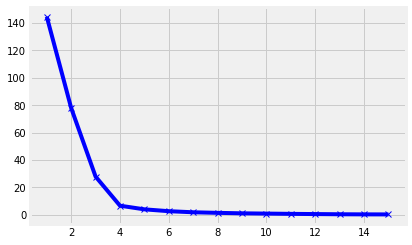

In [455]:
plt.plot(Z, ssd, 'bx-')
plt.show()

In [474]:
grp_confirmed

,Cluster Labels,Country/Region,Lat,Long,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,3,Afghanistan,33.000000,65.000000,0.000136,0.000198,0.000259,0.000271,0.000271,0.000271,0.000295,0.000295,0.000491,0.000491,0.000907,0.001029,0.001121,0.001082,0.000906,0.000852,0.001050,0.000925,0.001111,0.001121,0.001020,0.000969,0.001036,0.001002,0.001065,0.001036,0.001046,0.001049,0.001054,0.001093,0.001145,0.001175,0.001232,0.001258,0.001295,0.001274,0.001313,0.001308,0.001345,0.001399,0.001472,0.001492,0.001559,0.001585,0.001723,1.805286e-03,0.001865,2.030065e-03,2.116069e-03,0.002180,0.002335,0.002452,0.002677,0.002759,0.002834,0.002943,0.003080,0.003312,0.003477,0.003624,0.003758,0.003977
1,3,Albania,41.153300,20.168300,0.000469,0.000518,0.000629,0.000679,0.000727,0.000789,0.000862,0.000935,0.001093,0.001276,0.001508,0.001788,0.002075,0.001830,0.001622,0.001505,0.001378,0.001291,0.001215,0.001137,0.001104,0.001079,0.001072,0.001029,0.000964,0.000933,0.000884,0.000838,0.000823,0.000803,0.000804,0.000782,0.000776,0.000776,0.000770,0.000748,0.000741,0.000745,0.000750,0.000754,0.000763,0.000749,0.000759,0.000752,0.000745,7.406808e-04,0.000737,7.228190e-04,7.086793e-04,0.000697,0.000687,0.000680,0.000681,0.000677,0.000670,0.000662,0.000654,0.000653,0.000647,0.000640,0.000632,0.000633
2,3,Algeria,28.033900,1.659600,0.000457,0.000593,0.000666,0.000740,0.000912,0.001072,0.001108,0.001710,0.002468,0.002822,0.003236,0.003698,0.004378,0.004023,0.003738,0.003626,0.003609,0.003805,0.003972,0.004047,0.004253,0.004053,0.003919,0.003885,0.003697,0.003667,0.003600,0.003547,0.003467,0.003447,0.003415,0.003406,0.003394,0.003397,0.003456,0.003461,0.003465,0.003465,0.003462,0.003463,0.003460,0.003454,0.003471,0.003502,0.003559,3.603659e-03,0.003700,3.745942e-03,3.764519e-03,0.003792,0.003863,0.003938,0.004017,0.004065,0.004122,0.004182,0.004244,0.004305,0.004371,0.004430,0.004497,0.004543
3,3,Andorra,42.506300,1.521800,0.000012,0.000012,0.000025,0.000481,0.000481,0.000653,0.000923,0.001082,0.001388,0.001632,0.002010,0.002302,0.002672,0.002626,0.002536,0.002370,0.002286,0.001998,0.001829,0.001757,0.001594,0.001510,0.001488,0.001433,0.001372,0.001316,0.001260,0.001210,0.001142,0.001149,0.001113,0.001084,0.001058,0.001008,0.000995,0.000961,0.000940,0.000914,0.000883,0.000860,0.000832,0.000807,0.000787,0.000764,0.000752,7.337677e-04,0.000714,6.966367e-04,6.751485e-04,0.000660,0.000646,0.000635,0.000624,0.000611,0.000598,0.000586,0.000576,0.000568,0.000560,0.000554,0.000546,0.000536
4,3,Angola,-11.202700,17.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000025,0.000025,0.000037,0.000037,0.000037,0.000048,0.000039,0.000041,0.000050,0.000043,0.000037,0.000038,0.000033,0.000029,0.000032,0.000042,0.000044,0.000043,0.000044,0.000041,0.000038,0.000036,0.000034,0.000033,0.000031,0.000030,0.000028,0.000027,0.000033,0.000032,0.000031,0.000030,0.000030,0.000029,0.000028,0.000027,0.000027,0.000027,2.666451e-05,0.000026,2.524724e-05,2.718719e-05,0.000031,0.000030,0.000030,0.000030,0.000029,0.000029,0.000033,0.000033,0.000034,0.000033,0.000033,0.000032,0.000033
5,3,Antigua and Barbuda,17.060800,-61.796400,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000037,0.000037,0.000037,0.000083,0.000069,0.000058,0.000050,0.000043,0.000037,0.000033,0.000037,0.000054,0.000049,0.000045,0.000041,0.000048,0.000044,0.000041,0.000038,0.000040,0.000038,0.000040,0.000038,0.000036,0.000034,0.000033,0.000031,0.000030,0.000029,0.000028,0.000029,0.000028,0.000027,0.000026,0.000025,0.000024,2.370178e-05,0.00002